# Support-Vector Machine (SVM)
### Goal of lesson
- Learn about the problem of seperation
- The idea to maximize the distance
- Work with examples to demonstrate the issue

## Maximum Margin Separator
- Boundary that maximizes the distances between any of the data points ([Wiki](https://en.wikipedia.org/wiki/Support-vector_machine))

**The problem**

![SVM Example 0](https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/img/svm_ex0.png)

**The Maximum Margin Seperator**

![SVM Example 1](https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/img/svm_ex1.png)

### Support Vector Machine
- **sklearn** has Support Vector Classification ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))
- We will use the linear kernel ([docs](https://scikit-learn.org/stable/modules/svm.html#kernel-functions))
    - For more on kernels see [wiki](https://en.wikipedia.org/wiki/Kernel_method)

> #### Programming Notes:
> - Libraries used
>     - [**pandas**](https://pandas.pydata.org) - a data analysis and manipulation tool
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**sklearn**](https://scikit-learn.org/stable/) - tools for predictive data analysis
> - Functionality and concepts used
>     - [**CSV**](https://en.wikipedia.org/wiki/Comma-separated_values) file ([Lecture on CSV](https://youtu.be/LEyojSOg4EI))
>     - [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) read a comma-separated values (csv) file into **pandas** DataFrame.
>     - [**lambda**](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) lambda functions
>     - **List Comprehension** to convert data ([Lecture on **List Comprehension**](https://youtu.be/vCYEvtfXdig))
>     - [**apply()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to transform a **pandas** DataFrame
>     - [**SVM**](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html) to train (fit) the model

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/files/gender.csv')

In [3]:
data.head()

,Height,Hair length,Gender
0,151,99,F
1,193,8,M
2,150,123,F
3,176,0,M
4,188,11,M


In [4]:
data['Class']=data['Gender'].apply(lambda x: 'r' if x=='F' else 'b')

In [9]:
data.head()
data=data.iloc[:25]

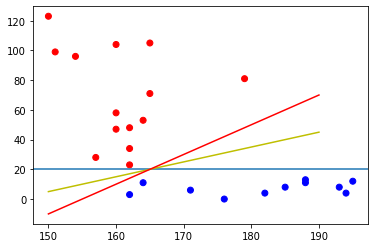

In [13]:
fig,ax = plt.subplots()

ax.scatter(x=data['Height'],y=data['Hair length'],c=data['Class'])
ax.axhline(20)
x=np.array([150,190])
ax.plot(x,x-145,c='y')
ax.plot(x,2*x-310,c='r')

In [22]:
X = data[['Height', 'Hair length']]
y = data['Gender']
y = np.array([0 if gender == 'M' else 1 for gender in y])

In [23]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [24]:
X_test = np.random.rand(10000,2)
X_test=X_test*(50,120)+(150,0)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


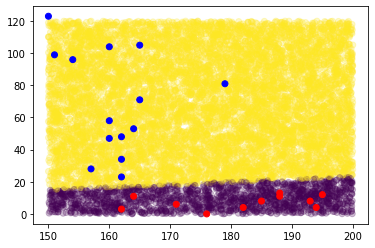

In [30]:
fig,ax=plt.subplots()
ax.scatter(x=X_test[:,0],y=X_test[:,1],c=y_pred,alpha=0.25)
y_color = np.array(['r' if x == 0 else 'b' for x in y])
ax.scatter(x=data['Height'],y=data['Hair length'],c=y_color)